In [11]:
import ot
import numpy as np
import matplotlib.pyplot as plt

from mnist import MNIST
from barycenters.utils import create_digits_image

from barycenters import euclidean
from barycenters import wasserstein
from barycenters import kullback_leibler

In [7]:
# Downloads the MNIST dataset
!mkdir ./data
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz -P ./data
!tar -zxvf ./data/MNIST.tar.gz -C ./data/

mkdir: cannot create directory ‘./data’: File exists
--2021-10-30 13:28:51--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-10-30 13:28:51--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘./data/MNIST.tar.gz’

MNIST.tar.gz            [         <=>        ]  33,20M  3,75MB/s    in 12s     

2021-10-30 13:29:03 (2,75 MB/s) - ‘./data/MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-

In [2]:
# Parameters
digit = 3
grid_size = 64
n_digits = 15
original_size = 20
is_distribution = True

In [3]:
data = MNIST(path='./data/MNIST/raw', return_type='numpy')
images, labels = data.load_training()

In [4]:
images = images.astype(float).reshape(-1, 28, 28) / 255

In [6]:
B = create_digits_image(images, labels,
                        digit=digit,
                        grid_size=grid_size,
                        n_digits=n_digits,
                        original_size=original_size,
                        is_distribution=is_distribution)

(-0.5, 63.5, 63.5, -0.5)

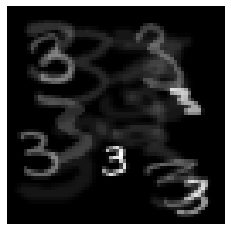

In [7]:
plt.imshow(sum(B).reshape(64, 64), cmap='gray')
plt.axis('off')

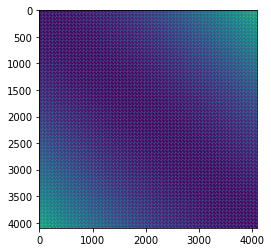

In [8]:
M = np.zeros([grid_size ** 2, grid_size ** 2])

for i in range(grid_size):
    for j in range(grid_size):
        for k in range(grid_size):
            for l in range(grid_size):
                k1 = i * grid_size + j
                k2 = k * grid_size + l
                M[k1, k2] = (j - l) ** 2 + (i - k) ** 2
plt.imshow(M)

In [13]:
a_euclidean = euclidean.fixed_support_barycenter(B)

In [14]:
a_wasserstein = wasserstein.fixed_support_barycenter(B, M, verbose=True)

[0, 100] |da|: 0.3165175434052418
[1, 100] |da|: 0.25441708467420227
[2, 100] |da|: 0.20118439814648553
[3, 100] |da|: 0.15975427350837565
[4, 100] |da|: 0.1285839424397299
[5, 100] |da|: 0.10541978876189695
[6, 100] |da|: 0.0880109977129541
[7, 100] |da|: 0.07495300468769224
[8, 100] |da|: 0.06477477171179877
[9, 100] |da|: 0.05664019538167514
[10, 100] |da|: 0.05013845357534329
[11, 100] |da|: 0.04480081896018641
[12, 100] |da|: 0.040305105765524214
[13, 100] |da|: 0.036635491635266165
[14, 100] |da|: 0.03347776408605667
[15, 100] |da|: 0.030747619266559018
[16, 100] |da|: 0.028262784061401824
[17, 100] |da|: 0.02624451068029634
[18, 100] |da|: 0.0244748583336703
[19, 100] |da|: 0.022778423048907512
[20, 100] |da|: 0.021363920973210465
[21, 100] |da|: 0.020118472457685926
[22, 100] |da|: 0.018835370643798373
[23, 100] |da|: 0.01777083114517205
[24, 100] |da|: 0.01685639925301454
[25, 100] |da|: 0.01596733265183165
[26, 100] |da|: 0.015137269990785787
[27, 100] |da|: 0.014386688518901

In [18]:
a_kld = kullback_leibler.fixed_support_barycenter(B, eta=1e-5)

[0, 100] |da|: 0.015943900461166186
[1, 100] |da|: 0.011587085591406178
[2, 100] |da|: 0.008408891026608786
[3, 100] |da|: 0.0060947097447507734
[4, 100] |da|: 0.004412718373485591
[5, 100] |da|: 0.0031922673657766376
[6, 100] |da|: 0.0023079432359696997
[7, 100] |da|: 0.0016678953204701335
[8, 100] |da|: 0.0012050362755996126
[9, 100] |da|: 0.0008705101330813453
[10, 100] |da|: 0.0006288282449622674
[11, 100] |da|: 0.0004542556512753633
[12, 100] |da|: 0.0003281718860838457
[13, 100] |da|: 0.00023710632971624528
[14, 100] |da|: 0.00017132917705673753
[15, 100] |da|: 0.00012381433987055976
[16, 100] |da|: 8.948829826863884e-05
[17, 100] |da|: 6.468735968433231e-05
[18, 100] |da|: 4.676645665198946e-05
[19, 100] |da|: 3.38145268232699e-05
[20, 100] |da|: 2.4452711720937193e-05
[21, 100] |da|: 1.76850837930889e-05
[22, 100] |da|: 1.2792118137351934e-05
[23, 100] |da|: 9.254000094391186e-06
[24, 100] |da|: 6.695226775905498e-06
[25, 100] |da|: 4.844500329952568e-06
[26, 100] |da|: 3.50573

(-0.5, 63.5, 63.5, -0.5)

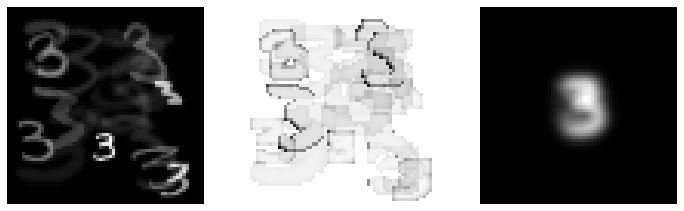

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(a_euclidean.reshape(grid_size, grid_size), cmap='gray')
axes[0].axis('off')

axes[1].imshow(a_kld.reshape(grid_size, grid_size), cmap='gray')
axes[1].axis('off')

axes[2].imshow(a_wasserstein.reshape(grid_size, grid_size), cmap='gray')
axes[2].axis('off')